In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [2]:
data_frame = pd.read_csv('Entrenamieto_ECI_2020.csv')
data_frame.Account_Created_Date = pd.to_datetime(data_frame.Account_Created_Date)
data_frame.Actual_Delivery_Date = pd.to_datetime(data_frame.Actual_Delivery_Date)
data_frame.Opportunity_Created_Date = pd.to_datetime(data_frame.Opportunity_Created_Date)
data_frame.Quote_Expiry_Date = pd.to_datetime(data_frame.Quote_Expiry_Date)
data_frame.Last_Modified_Date = pd.to_datetime(data_frame.Last_Modified_Date)
data_frame.Planned_Delivery_Start_Date = pd.to_datetime(data_frame.Planned_Delivery_Start_Date)
data_frame

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,Q2,2016,NaT,0,EUR,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,2015-10-20,...,Q2,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None


In [3]:
oportunidades_cerradas = data_frame[(((data_frame.Stage == 'Closed Lost') | (data_frame.Stage == 'Closed Won') ) & (data_frame.Region == 'APAC') ) ]
oportunidades_cerradas

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,2015-10-13,...,Q1,2016,NaT,3,USD,1621851.0,USD,1621851.0,Closed Won,Prod_Category_A_None
24,4915,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2015-12-09,...,Q1,2016,NaT,0,USD,221650.0,USD,221650.0,Closed Lost,Prod_Category_A_None
77,4937,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2015-12-14,...,Q1,2016,NaT,0,USD,3920.0,USD,3920.0,Closed Won,Prod_Category_A_None
133,21588,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2014-09-09,...,Q1,2016,NaT,0,USD,109760.0,USD,109760.0,Closed Won,Prod_Category_A_None
136,18985,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2013-07-28,...,Q1,2016,NaT,0,USD,17550.0,USD,17550.0,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16835,28338,APAC,India,1,0,0,0,0,Bureaucratic_Code_5,2015-09-09,...,Q1,2016,NaT,0,USD,70200.0,USD,70200.0,Closed Won,Prod_Category_A_None
16858,10309,APAC,Indonesia,1,0,1,0,0,Bureaucratic_Code_5,2016-02-01,...,Q2,2017,NaT,9,USD,4954950.0,USD,4055000.0,Closed Lost,Prod_Category_A_None
16859,10315,APAC,Indonesia,1,0,1,0,0,Bureaucratic_Code_5,2016-02-01,...,Q2,2017,NaT,0,USD,4055000.0,USD,4055000.0,Closed Lost,Prod_Category_A_None
16860,10572,APAC,Indonesia,0,0,0,0,0,Bureaucratic_Code_3,2017-03-16,...,Q3,2017,NaT,1,USD,362520.0,USD,362520.0,Closed Won,Prod_Category_A_None


In [4]:
oportunidades_ganadas_APAC = data_frame[(data_frame.Stage == 'Closed Won') & (data_frame.Region == 'APAC')]
oportunidades_ganadas_APAC

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,2015-10-13,...,Q1,2016,NaT,3,USD,1621851.0,USD,1621851.0,Closed Won,Prod_Category_A_None
77,4937,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2015-12-14,...,Q1,2016,NaT,0,USD,3920.0,USD,3920.0,Closed Won,Prod_Category_A_None
133,21588,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2014-09-09,...,Q1,2016,NaT,0,USD,109760.0,USD,109760.0,Closed Won,Prod_Category_A_None
260,18479,APAC,Singapore,0,0,0,0,0,Bureaucratic_Code_4,2013-07-28,...,Q1,2016,NaT,0,USD,22950.0,USD,22950.0,Closed Won,Prod_Category_A_None
279,18475,APAC,Singapore,1,1,0,0,0,Bureaucratic_Code_4,2013-07-28,...,Q1,2016,NaT,0,USD,3825.0,USD,3825.0,Closed Won,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16389,19008,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,2013-07-28,...,Q1,2016,NaT,1,USD,632905.0,USD,632905.0,Closed Won,Prod_Category_A_None
16678,28548,APAC,Indonesia,1,1,1,1,0,Bureaucratic_Code_4,2015-10-16,...,Q2,2016,NaT,0,USD,17242.5,USD,17242.5,Closed Won,Prod_Category_A_None
16697,18891,APAC,India,0,0,0,0,0,Bureaucratic_Code_4,2014-01-28,...,Q3,2016,NaT,0,USD,45500.0,USD,45500.0,Closed Won,Prod_Category_A_None
16835,28338,APAC,India,1,0,0,0,0,Bureaucratic_Code_5,2015-09-09,...,Q1,2016,NaT,0,USD,70200.0,USD,70200.0,Closed Won,Prod_Category_A_None


In [5]:
oportunidades_perdidas_APAC = data_frame[(data_frame.Stage == 'Closed Lost') & (data_frame.Region == 'APAC')]
oportunidades_perdidas_APAC

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
24,4915,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2015-12-09,...,Q1,2016,NaT,0,USD,221650.0,USD,221650.0,Closed Lost,Prod_Category_A_None
136,18985,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2013-07-28,...,Q1,2016,NaT,0,USD,17550.0,USD,17550.0,Closed Lost,Prod_Category_A_None
137,23583,APAC,India,1,0,1,0,0,Bureaucratic_Code_5,2014-12-18,...,Q2,2016,NaT,13,USD,6695835.3,USD,13438632.9,Closed Lost,Prod_Category_A_None
138,23584,APAC,India,1,0,1,0,0,Bureaucratic_Code_5,2014-12-18,...,Q2,2016,NaT,13,USD,6742797.6,USD,13438632.9,Closed Lost,Prod_Category_A_None
280,8220,APAC,Philippines,1,0,0,0,0,Bureaucratic_Code_5,2016-01-06,...,Q1,2016,NaT,0,USD,221650.0,USD,221650.0,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16822,28752,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2015-11-19,...,Q1,2016,NaT,2,USD,1100962.5,USD,2216362.5,Closed Lost,Prod_Category_A_None
16823,28755,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,2015-11-19,...,Q1,2016,NaT,1,USD,561275.0,USD,561275.0,Closed Lost,Prod_Category_A_None
16858,10309,APAC,Indonesia,1,0,1,0,0,Bureaucratic_Code_5,2016-02-01,...,Q2,2017,NaT,9,USD,4954950.0,USD,4055000.0,Closed Lost,Prod_Category_A_None
16859,10315,APAC,Indonesia,1,0,1,0,0,Bureaucratic_Code_5,2016-02-01,...,Q2,2017,NaT,0,USD,4055000.0,USD,4055000.0,Closed Lost,Prod_Category_A_None


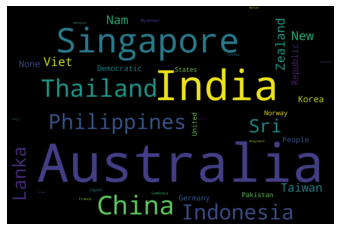

In [6]:
text = " ".join(country for country in oportunidades_cerradas.Billing_Country)
paises_ganados = oportunidades_ganadas_APAC.Billing_Country.astype(str)

wordcloud = WordCloud(collocations=False,background_color="black",
                          width=3000, height=2000).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
#plt.figure( figsize=(20,10) )
plt.axis("off")
plt.show()


In [7]:
oportunidades_totales_pais = oportunidades_cerradas.Billing_Country.value_counts().to_frame(name = 'Oportunidades totales cerradas por pais')
oportunidades_totales_pais

,Oportunidades totales cerradas por pais
Australia,1165
India,668
Singapore,418
China,221
Thailand,193
Indonesia,139
Philippines,138
Sri Lanka,105
New Zealand,39
Viet Nam,37


In [8]:
ganadas_por_pais_APAC_df = oportunidades_ganadas_APAC.Billing_Country.value_counts().to_frame()
ganadas_por_pais_APAC_df.columns=['Oportunidades ganadas']
ganadas_por_pais_APAC_df

,Oportunidades ganadas
Australia,695
Singapore,314
India,284
China,203
Thailand,90
Philippines,83
Sri Lanka,79
Indonesia,53
New Zealand,32
Viet Nam,16


In [9]:
perdidas_por_pais_APAC_df = oportunidades_perdidas_APAC.Billing_Country.value_counts().to_frame()
perdidas_por_pais_APAC_df.columns=[ 'Oportunidades perdidas']
perdidas_por_pais_APAC_df

,Oportunidades perdidas
Australia,470
India,384
Singapore,104
Thailand,103
Indonesia,86
Philippines,55
Sri Lanka,26
Taiwan,24
Viet Nam,21
None,18


In [10]:
lista_paises = [ganadas_por_pais_APAC_df, oportunidades_totales_pais, perdidas_por_pais_APAC_df]
top5_paises = pd.concat(lista_paises, join = 'outer', axis = 1).fillna(0).nlargest(5, 'Oportunidades ganadas')
top5_paises

,Oportunidades ganadas,Oportunidades totales cerradas por pais,Oportunidades perdidas
Australia,695.0,1165,470.0
Singapore,314.0,418,104.0
India,284.0,668,384.0
China,203.0,221,18.0
Thailand,90.0,193,103.0


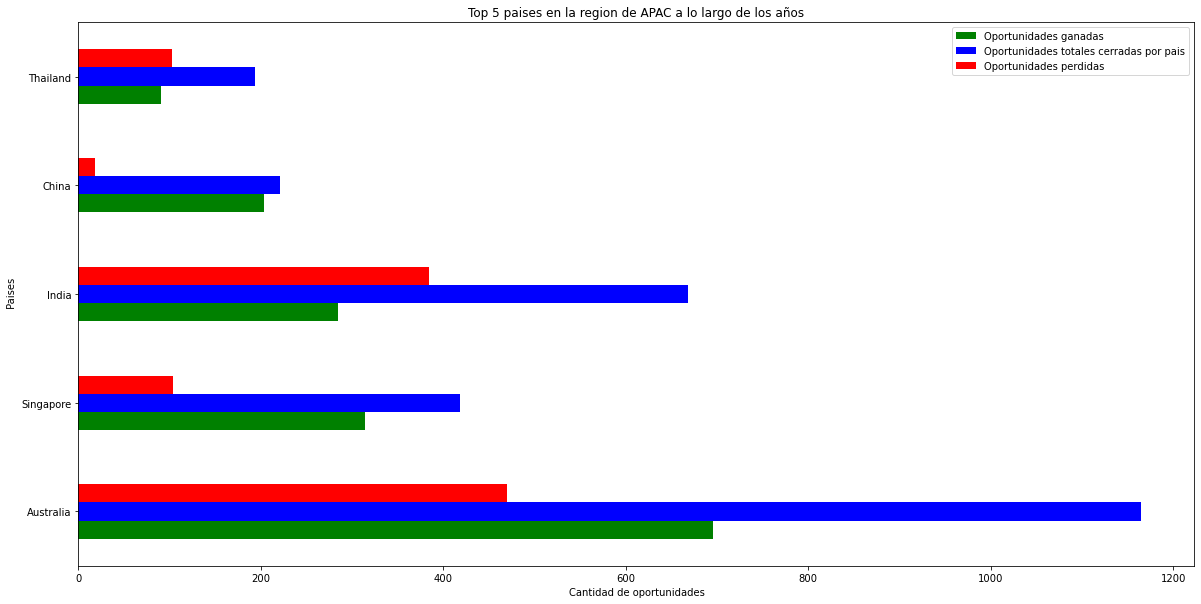

In [11]:
top5_paises.plot.barh( title = 'Top 5 paises en la region de APAC a lo largo de los años' , rot = 0, figsize = ((20,10)), color = ['green', 'blue', 'red'])
ax=plt.gca()
ax.set_ylabel(' Paises')
ax.set_xlabel('Cantidad de oportunidades')
plt.show()

In [12]:
estado_oportunidades_segun_anio_creacion = oportunidades_cerradas['Stage'].to_frame()
estado_oportunidades_segun_anio_creacion['Anio_creado']= oportunidades_cerradas.Opportunity_Created_Date.dt.year
estado_oportunidades_segun_anio_creacion

,Stage,Anio_creado
23,Closed Won,2015
24,Closed Lost,2015
77,Closed Won,2015
133,Closed Won,2015
136,Closed Lost,2015
...,...,...
16835,Closed Won,2015
16858,Closed Lost,2015
16859,Closed Lost,2015
16860,Closed Won,2015


In [13]:
vendedores_totales = oportunidades_cerradas.Account_Owner.value_counts().to_frame( name = 'Oportunidades Creadas')
vendedores_totales

,Oportunidades Creadas
Person_Name_43,1235
Person_Name_65,631
Person_Name_60,225
Person_Name_59,200
Person_Name_49,200
Person_Name_54,178
Person_Name_52,172
Person_Name_21,166
Person_Name_63,135
Person_Name_44,54


In [14]:
vendedores_ganados = oportunidades_ganadas_APAC.Account_Owner.value_counts().to_frame( name = 'Oportunidades ganadas')
vendedores_ganados

,Oportunidades ganadas
Person_Name_43,727
Person_Name_65,504
Person_Name_52,141
Person_Name_21,132
Person_Name_49,105
Person_Name_54,96
Person_Name_60,66
Person_Name_59,59
Person_Name_63,54
Person_Name_44,9


In [15]:
vendedores_perdidos = oportunidades_perdidas_APAC.Account_Owner.value_counts().to_frame( name = 'Oportunidades perdidas')
vendedores_perdidos

,Oportunidades perdidas
Person_Name_43,508
Person_Name_60,159
Person_Name_59,141
Person_Name_65,127
Person_Name_49,95
Person_Name_54,82
Person_Name_63,81
Person_Name_44,45
Person_Name_21,34
Person_Name_52,31


In [16]:
lista_vendedores = [ vendedores_ganados, vendedores_totales, vendedores_perdidos]
top_5_vendedores = pd.concat(lista_vendedores, join = 'outer', axis = 1).fillna(0).nlargest(5, 'Oportunidades ganadas')
top_5_vendedores

,Oportunidades ganadas,Oportunidades Creadas,Oportunidades perdidas
Person_Name_43,727.0,1235,508
Person_Name_65,504.0,631,127
Person_Name_52,141.0,172,31
Person_Name_21,132.0,166,34
Person_Name_49,105.0,200,95


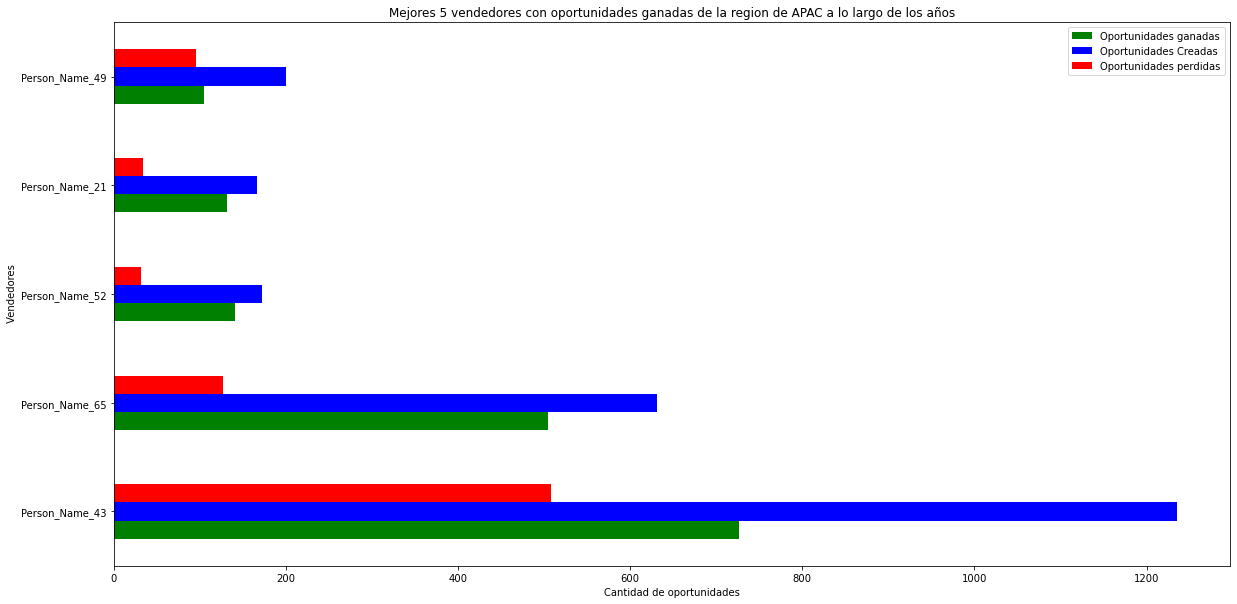

In [17]:
top_5_vendedores.plot.barh( title = 'Mejores 5 vendedores con oportunidades ganadas de la region de APAC a lo largo de los años' , rot = 0, figsize = ((20,10)), color = ['green', 'blue', 'red'])
ax=plt.gca()
ax.set_ylabel(' Vendedores')
ax.set_xlabel('Cantidad de oportunidades')
plt.show()

In [18]:
anios_totales = oportunidades_cerradas.Opportunity_Created_Date.dt.year.value_counts().to_frame(name = 'Cantidad de oportunidad creadas').sort_index()
anios_totales

,Cantidad de oportunidad creadas
2014,13
2015,68
2016,684
2017,1468
2018,1018


In [19]:
anios_casos_ganados = oportunidades_ganadas_APAC.Opportunity_Created_Date.dt.year.value_counts().to_frame(name = 'Cantidad oportunidades ganadas').sort_index()
anios_casos_ganados

,Cantidad oportunidades ganadas
2014,1
2015,10
2016,421
2017,850
2018,614


In [20]:
anios_casos_perdidos = oportunidades_perdidas_APAC.Opportunity_Created_Date.dt.year.value_counts().to_frame(name = 'Cantidad oportunidades perdidas').sort_index()
anios_casos_perdidos

,Cantidad oportunidades perdidas
2014,12
2015,58
2016,263
2017,618
2018,404


In [21]:
lista_casos_anios = [anios_casos_ganados, anios_totales, anios_casos_perdidos]
grafico_anios = pd.concat(lista_casos_anios, join = 'outer', axis = 1).fillna(0)
grafico_anios

,Cantidad oportunidades ganadas,Cantidad de oportunidad creadas,Cantidad oportunidades perdidas
2014,1,13,12
2015,10,68,58
2016,421,684,263
2017,850,1468,618
2018,614,1018,404


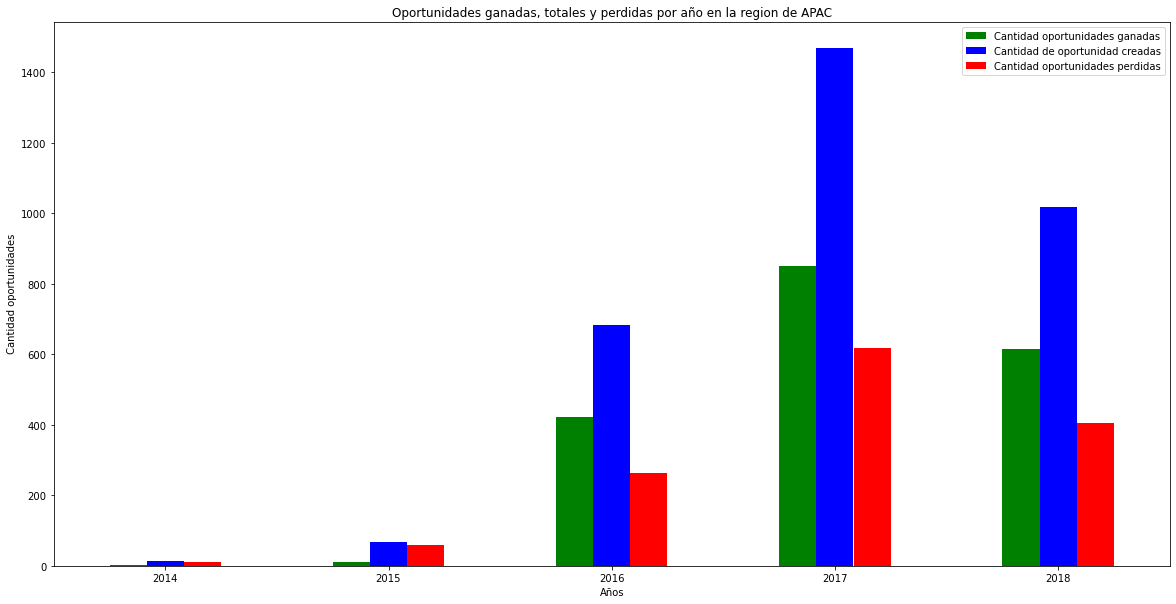

In [22]:
grafico_anios.plot.bar( title = 'Oportunidades ganadas, totales y perdidas por año en la region de APAC' , rot = 0, figsize = ((20,10)), color=['green','blue','red'])
ax=plt.gca()
ax.set_ylabel(' Cantidad oportunidades');
ax.set_xlabel('Años')
plt.show()

In [23]:
anio_2017 = oportunidades_cerradas[ oportunidades_cerradas.Opportunity_Created_Date.dt.year == 2017]
anio_2017

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
676,13838,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,2016-04-18,...,Q1,2017,NaT,1,USD,206976.0,USD,206976.0,Closed Won,Prod_Category_A_None
677,13843,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,2016-04-18,...,Q1,2017,NaT,0,USD,103488.0,USD,103488.0,Closed Won,Prod_Category_A_None
678,13831,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,2016-04-18,...,Q1,2017,NaT,1,USD,206976.0,USD,206976.0,Closed Won,Prod_Category_A_None
680,8194,APAC,Singapore,1,1,1,1,0,Bureaucratic_Code_4,2016-07-15,...,Q1,2017,NaT,0,USD,6048.0,USD,18345.6,Closed Won,Prod_Category_A_None
681,8200,APAC,Singapore,1,1,1,1,0,Bureaucratic_Code_4,2016-07-15,...,Q1,2017,NaT,0,USD,12297.6,USD,18345.6,Closed Won,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11462,9675,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,2016-01-29,...,Q1,2018,NaT,0,USD,120.6,USD,39805.5,Closed Won,Prod_Category_A_None
11463,9681,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,2016-01-29,...,Q1,2018,NaT,0,USD,3682.8,USD,39805.5,Closed Won,Prod_Category_A_None
11464,9686,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,2016-01-29,...,Q1,2018,NaT,0,USD,28512.0,USD,39805.5,Closed Won,Prod_Category_A_None
11465,9692,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,2016-01-29,...,Q1,2018,NaT,0,USD,1115.1,USD,39805.5,Closed Won,Prod_Category_A_None


In [24]:
anio_2017_vendedores = anio_2017.Account_Owner.value_counts().to_frame( name = 'Cantidad oportunidades creadas por vendedor en el 2017')
anio_2017_vendedores

,Cantidad oportunidades creadas por vendedor en el 2017
Person_Name_43,638
Person_Name_65,272
Person_Name_59,108
Person_Name_60,107
Person_Name_52,92
Person_Name_49,76
Person_Name_21,56
Person_Name_54,54
Person_Name_63,47
Person_Name_44,9


In [25]:
anio_2017_vendedores_ganados = anio_2017[anio_2017.Stage == 'Closed Won'].Account_Owner.value_counts().to_frame(name = 'Cantidad oportunidades ganadas por vendedor en el 2017')
anio_2017_vendedores_ganados

,Cantidad oportunidades ganadas por vendedor en el 2017
Person_Name_43,370
Person_Name_65,211
Person_Name_52,75
Person_Name_21,47
Person_Name_49,38
Person_Name_60,35
Person_Name_54,32
Person_Name_59,21
Person_Name_63,19
Person_Name_44,2


In [26]:
anio_2017_vendedores_perdidos = anio_2017[anio_2017.Stage == 'Closed Lost'].Account_Owner.value_counts().to_frame(name = 'Cantidad oportunidades perdidas por vendedor en el 2017')
anio_2017_vendedores_perdidos

,Cantidad oportunidades perdidas por vendedor en el 2017
Person_Name_43,268
Person_Name_59,87
Person_Name_60,72
Person_Name_65,61
Person_Name_49,38
Person_Name_63,28
Person_Name_54,22
Person_Name_52,17
Person_Name_21,9
Person_Name_44,7


In [27]:
lista_anio_2017 = [anio_2017_vendedores_ganados, anio_2017_vendedores, anio_2017_vendedores_perdidos]
top_5_vendedores_2017 = pd.concat(lista_anio_2017, join = 'outer', axis = 1).fillna(0).nlargest(5, 'Cantidad oportunidades ganadas por vendedor en el 2017')
top_5_vendedores_2017

,Cantidad oportunidades ganadas por vendedor en el 2017,Cantidad oportunidades creadas por vendedor en el 2017,Cantidad oportunidades perdidas por vendedor en el 2017
Person_Name_43,370.0,638,268
Person_Name_65,211.0,272,61
Person_Name_52,75.0,92,17
Person_Name_21,47.0,56,9
Person_Name_49,38.0,76,38


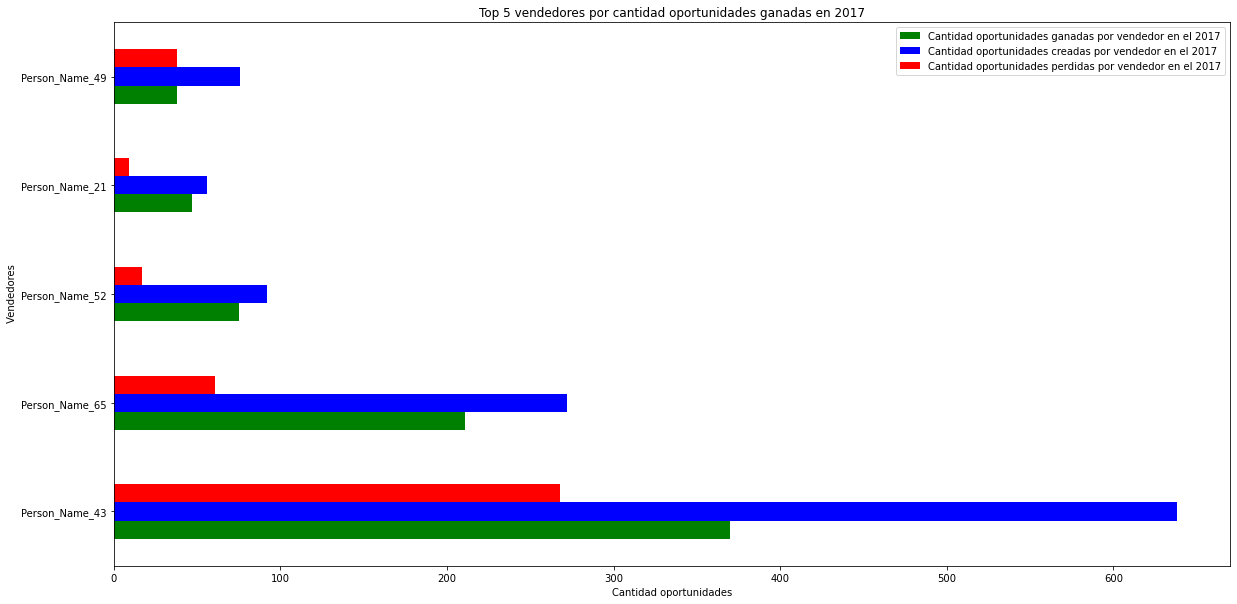

In [29]:
top_5_vendedores_2017.plot.barh( title = 'Top 5 vendedores por cantidad oportunidades ganadas en 2017' , rot = 0, figsize = ((20,10)), color=['green','blue','red'])
ax=plt.gca()
ax.set_ylabel(' Vendedores');
ax.set_xlabel('Cantidad oportunidades')
plt.show()